In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

In [2]:
df = pd.read_csv('general_data.csv',encoding="latin1")

In [3]:
#explorativna analyza

In [4]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
df.describe()
#priemerny vek je okolo 37 rokov, minimalny vek je 18 rokov, maximalny je 60 ....

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [6]:
df["EmployeeCount"].value_counts()

1    4410
Name: EmployeeCount, dtype: int64

In [7]:
df["StandardHours"].value_counts()

8    4410
Name: StandardHours, dtype: int64

In [8]:
#std ked je tam 0 znamena ze su vsetky data rovnake (taku premennu nepotrebujeme)
df.drop(["EmployeeCount","StandardHours","EmployeeID"],axis=1,inplace=True)

In [9]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,131160,1.0,Y,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,41890,0.0,Y,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,193280,1.0,Y,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,83210,3.0,Y,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,23420,4.0,Y,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,60290,3.0,Y,17,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,26790,2.0,Y,15,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,37020,0.0,Y,20,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,...,23980,0.0,Y,14,1,10.0,2,9,7,8


In [10]:
#ci su nejake chybajuce hondnoty
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  Over18                   4410 non-null   object 
 14  PercentSalaryHike       

In [11]:
#hladame chybajuce hodnoty
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [12]:
#vyhodili sme 19 chybnych zaznamov
df=df.dropna(subset=["NumCompaniesWorked","TotalWorkingYears"])
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [13]:
ciselne=list(df.dtypes[df.dtypes!="object"].index.values)
slovne=list(df.dtypes[df.dtypes=="object"].index.values)

In [14]:
ciselne

['Age',
 'DistanceFromHome',
 'Education',
 'JobLevel',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [15]:
slovne

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18']

In [16]:
df_ciselne=df.loc[:,ciselne]

In [17]:
df_ciselne

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,6,2,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,10,1,1,41890,0.0,23,1,6.0,3,5,1,4
2,32,17,4,4,193280,1.0,15,3,5.0,2,5,0,3
3,38,2,5,3,83210,3.0,11,3,13.0,5,8,7,5
4,32,10,1,1,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,4,3,2,35390,1.0,18,0,6.0,2,6,1,5
4405,42,5,4,1,60290,3.0,17,1,10.0,5,3,0,2
4406,29,2,4,1,26790,2.0,15,0,10.0,2,3,0,2
4407,25,25,2,2,37020,0.0,20,0,5.0,4,4,1,2


In [18]:
#vytvoríme si nový dataset, kde sa nachádzajú len slovné premenné
df_slovne=df.loc[:,slovne]

In [19]:
df_slovne

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
0,No,Travel_Rarely,Sales,Life Sciences,Female,Healthcare Representative,Married,Y
1,Yes,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Single,Y
2,No,Travel_Frequently,Research & Development,Other,Male,Sales Executive,Married,Y
3,No,Non-Travel,Research & Development,Life Sciences,Male,Human Resources,Married,Y
4,No,Travel_Rarely,Research & Development,Medical,Male,Sales Executive,Single,Y
...,...,...,...,...,...,...,...,...
4404,No,Travel_Rarely,Sales,Other,Female,Human Resources,Single,Y
4405,No,Travel_Rarely,Research & Development,Medical,Female,Research Scientist,Single,Y
4406,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Divorced,Y
4407,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y


In [20]:
#attrition je naša závislá(cieľová) premenná a je kategoriálna
#aby sme mohli skúmať vzťah medzi závislou a nezávislými prem. prekódujeme ju na číselnú premennú
df["Attrition"]=df["Attrition"].astype("category")
df_ciselne["Attrition_num"]=df["Attrition"].cat.codes
df_ciselne.shape
#0 - NO
#1 - YES

C:\Users\risom\AppData\Local\Temp\ipykernel_22536\3031000018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Attrition"]=df["Attrition"].astype("category")


(4382, 14)

In [21]:
df_ciselne

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_num
0,51,6,2,1,131160,1.0,11,0,1.0,6,1,0,0,0
1,31,10,1,1,41890,0.0,23,1,6.0,3,5,1,4,1
2,32,17,4,4,193280,1.0,15,3,5.0,2,5,0,3,0
3,38,2,5,3,83210,3.0,11,3,13.0,5,8,7,5,0
4,32,10,1,1,23420,4.0,12,2,9.0,2,6,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,4,3,2,35390,1.0,18,0,6.0,2,6,1,5,0
4405,42,5,4,1,60290,3.0,17,1,10.0,5,3,0,2,0
4406,29,2,4,1,26790,2.0,15,0,10.0,2,3,0,2,0
4407,25,25,2,2,37020,0.0,20,0,5.0,4,4,1,2,0


In [22]:
korel=df_ciselne.corr()
korel

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_num
Age,1.000000,0.007376,-0.033900,-0.001137,-0.045163,0.299527,-0.032561,-0.031504,0.680037,-0.028962,0.311281,0.215650,0.201580,-0.158399
DistanceFromHome,0.007376,1.000000,-0.007491,-0.039990,-0.022757,-0.014449,0.037720,0.009353,0.009574,-0.008957,0.030746,0.002243,0.021773,-0.009449
Education,-0.033900,-0.007491,1.000000,0.045822,0.007289,-0.016210,-0.041054,0.002386,-0.009228,0.009939,0.005997,0.023457,0.005645,-0.017106
JobLevel,-0.001137,-0.039990,0.045822,1.000000,0.046688,-0.009759,0.010874,0.000365,-0.036293,-0.031931,-0.063360,-0.059680,-0.053898,-0.012382
MonthlyIncome,-0.045163,-0.022757,0.007289,0.046688,1.000000,-0.021446,0.004607,0.027242,-0.034398,0.049780,0.000088,0.064470,0.023095,-0.030160
NumCompaniesWorked,0.299527,-0.014449,-0.016210,-0.009759,-0.021446,1.000000,0.030064,0.016291,0.238807,-0.031335,-0.117213,-0.035855,-0.109372,0.042831
PercentSalaryHike,-0.032561,0.037720,-0.041054,0.010874,0.004607,0.030064,1.000000,0.012104,-0.018480,-0.036720,-0.029022,-0.028654,-0.039687,0.033153
StockOptionLevel,-0.031504,0.009353,0.002386,0.000365,0.027242,0.016291,0.012104,1.000000,0.003138,-0.068028,0.009369,0.019889,0.019398,-0.008164
TotalWorkingYears,0.680037,0.009574,-0.009228,-0.036293,-0.034398,0.238807,-0.018480,0.003138,1.000000,-0.041459,0.627738,0.404058,0.458640,-0.169670
TrainingTimesLastYear,-0.028962,-0.008957,0.009939,-0.031931,0.049780,-0.031335,-0.036720,-0.068028,-0.041459,1.000000,-0.010447,0.015340,-0.015792,-0.047586


In [23]:
korel["Attrition_num"].sort_values(ascending=False)

Attrition_num              1.000000
NumCompaniesWorked         0.042831
PercentSalaryHike          0.033153
StockOptionLevel          -0.008164
DistanceFromHome          -0.009449
JobLevel                  -0.012382
Education                 -0.017106
MonthlyIncome             -0.030160
YearsSinceLastPromotion   -0.031423
TrainingTimesLastYear     -0.047586
YearsAtCompany            -0.133003
YearsWithCurrManager      -0.154692
Age                       -0.158399
TotalWorkingYears         -0.169670
Name: Attrition_num, dtype: float64

In [24]:
plt.figure(figsize=(16,10))
#sns.heatmap(korel,vmin=-1,vmax=1,annot=True )

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<AxesSubplot:xlabel='Attrition', ylabel='count'>

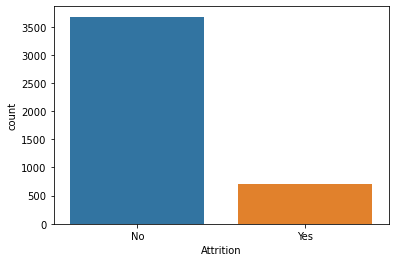

In [25]:
sns.countplot(x="Attrition",data=df)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

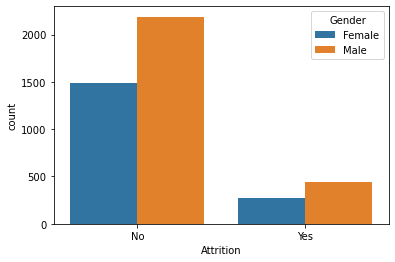

In [26]:
sns.countplot(x="Attrition",data=df,hue="Gender")

<AxesSubplot:xlabel='Attrition', ylabel='count'>

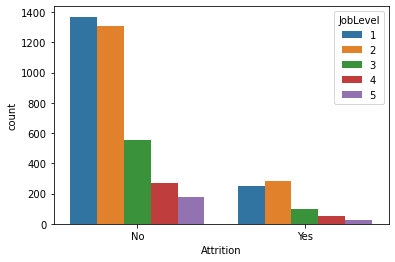

In [27]:
sns.countplot(x="Attrition",data=df,hue="JobLevel")

In [33]:
def Age(dataframe):
    dataframe.loc[dataframe['Age']<=30,'Age']=1
    dataframe.loc[(dataframe['Age']>30)&(dataframe['Age']<=40),'Age']=2
    dataframe.loc[(dataframe['Age']>40)&(dataframe['Age']<=50),'Age']=3
    dataframe.loc[(dataframe['Age']>50)&(dataframe['Age']<=60),'Age']=4
    return dataframe

Age(df);

In [34]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,4,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,131160,1.0,Y,11,0,1.0,6,1,0,0
1,2,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,41890,0.0,Y,23,1,6.0,3,5,1,4
2,2,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,193280,1.0,Y,15,3,5.0,2,5,0,3
3,2,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,83210,3.0,Y,11,3,13.0,5,8,7,5
4,2,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,23420,4.0,Y,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,1,No,Travel_Rarely,Sales,4,3,Other,Female,2,Human Resources,...,35390,1.0,Y,18,0,6.0,2,6,1,5
4405,3,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,60290,3.0,Y,17,1,10.0,5,3,0,2
4406,1,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,26790,2.0,Y,15,0,10.0,2,3,0,2
4407,1,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,37020,0.0,Y,20,0,5.0,4,4,1,2


<AxesSubplot:xlabel='Attrition', ylabel='count'>

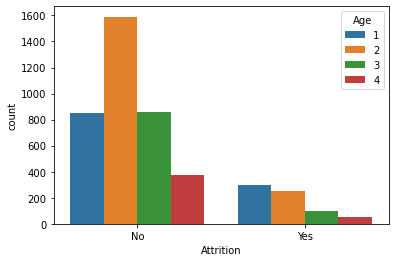

In [35]:
sns.countplot(x="Attrition",data=df,hue="Age")

In [36]:
print(df['BusinessTravel'].unique())
print(df['EducationField'].unique())
print(df['Gender'].unique())
print(df['Department'].unique())
print(df['JobRole'].unique())
print(df['MaritalStatus'].unique())
print(df['Over18'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Sales' 'Research & Development' 'Human Resources']
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
['Married' 'Single' 'Divorced']
['Y']


In [38]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X=LabelEncoder()
df['BusinessTravel']=labelEncoder_X.fit_transform(df['BusinessTravel'])
df['Department']=labelEncoder_X.fit_transform(df['Department'])
df['EducationField']=labelEncoder_X.fit_transform(df['EducationField'])
df['Gender']=labelEncoder_X.fit_transform(df['Gender'])
df['JobRole']=labelEncoder_X.fit_transform(df['JobRole'])
df['MaritalStatus']=labelEncoder_X.fit_transform(df['MaritalStatus'])
df['Over18']=labelEncoder_X.fit_transform(df['Over18'])

C:\Users\risom\AppData\Local\Temp\ipykernel_22536\1572285019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BusinessTravel']=labelEncoder_X.fit_transform(df['BusinessTravel'])
C:\Users\risom\AppData\Local\Temp\ipykernel_22536\1572285019.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Department']=labelEncoder_X.fit_transform(df['Department'])
C:\Users\risom\AppData\Local\Temp\ipykernel_22536\1572285019.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [39]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,4,No,2,2,6,2,1,0,1,0,...,131160,1.0,0,11,0,1.0,6,1,0,0
1,2,Yes,1,1,10,1,1,0,1,6,...,41890,0.0,0,23,1,6.0,3,5,1,4
2,2,No,1,1,17,4,4,1,4,7,...,193280,1.0,0,15,3,5.0,2,5,0,3
3,2,No,0,1,2,5,1,1,3,1,...,83210,3.0,0,11,3,13.0,5,8,7,5
4,2,No,2,1,10,1,3,1,1,7,...,23420,4.0,0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,1,No,2,2,4,3,4,0,2,1,...,35390,1.0,0,18,0,6.0,2,6,1,5
4405,3,No,2,1,5,4,3,0,1,6,...,60290,3.0,0,17,1,10.0,5,3,0,2
4406,1,No,2,1,2,4,3,1,1,2,...,26790,2.0,0,15,0,10.0,2,3,0,2
4407,1,No,2,1,25,2,1,1,2,7,...,37020,0.0,0,20,0,5.0,4,4,1,2


In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder_y=LabelEncoder()
df['Attrition']=label_encoder_y.fit_transform(df['Attrition'])

C:\Users\risom\AppData\Local\Temp\ipykernel_22536\3177071466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attrition']=label_encoder_y.fit_transform(df['Attrition'])


In [41]:
korel1=df.corr()
plt.figure(figsize=(16,10))
#sns.heatmap(korel1, vmin=-1,vmax=1, annot=True)

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

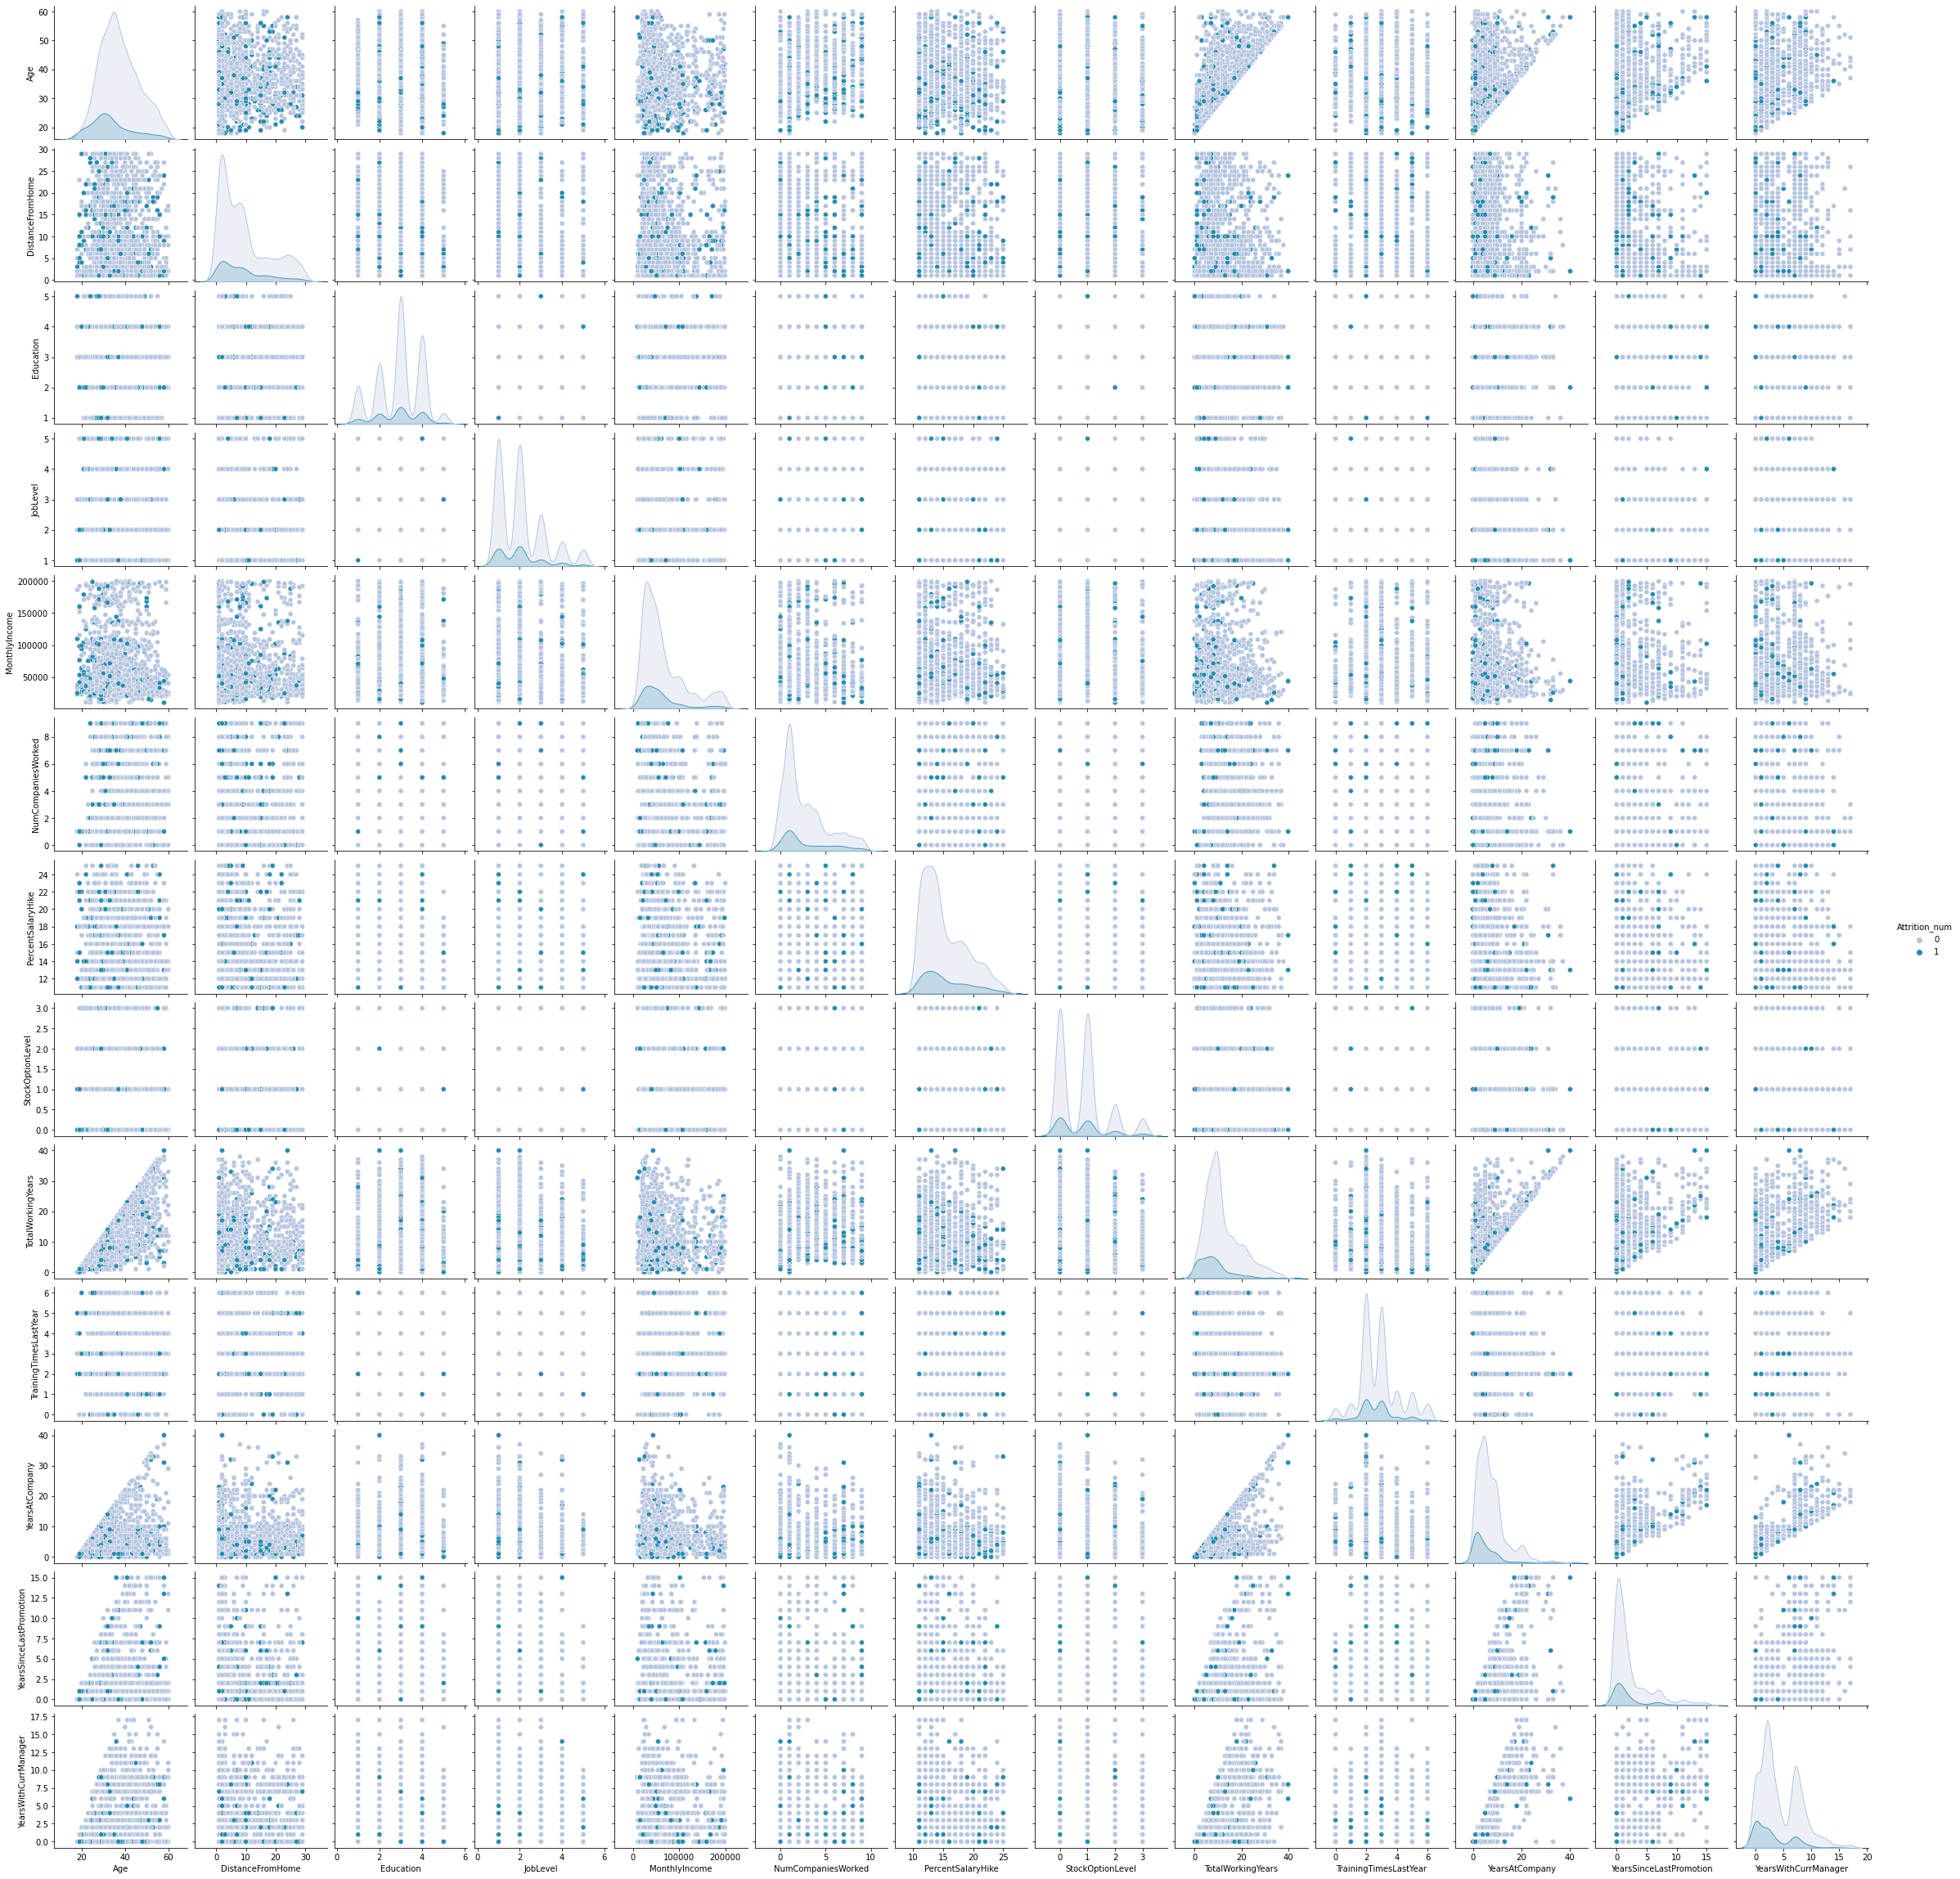

In [42]:
sns.pairplot(df_ciselne,hue='Attrition_num',palette="PuBuGn")

<AxesSubplot:xlabel='MonthlyIncome', ylabel='TotalWorkingYears'>

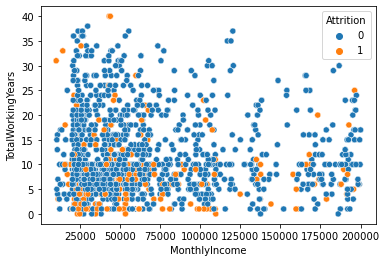

In [43]:
sns.scatterplot(data=df,x="MonthlyIncome",y="TotalWorkingYears",hue="Attrition")

In [45]:
X=df_ciselne[["MonthlyIncome","Education"]]
y=df_ciselne["Attrition_num"]

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=125)

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import naive_bayes
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [49]:
algos=["Support Vector Machine","Decision Tree","Logistic Regression","K Nearest Neighbor","Naive Bayes","R
clfs=[svm.SVC(kernel="linear"),DecisionTreeClassifier(),LogisticRegression(),KNeighborsClassifier(n_neighbo
                                                                                                  naive_bayes.GaussianNB(),RandomForestClassifier()]

result=[]

for clff in clfs:
clff.fit(X_train,y_train)
y_pred=clff.predict(X_test)#odhadneme cieľovú triedu pre prvky testovacej množiny
acc=accuracy_score(y_test,y_pred)
result.append(acc)
result_df=pd.DataFrame(result,index=algos)
result_df.columns=["Accuracy"]
result_df.sort_values(by="Accuracy",ascending=False)

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (1001655601.py, line 2)